In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#sample dataset , may have high MAE
data=pd.read_csv("/content/Salary_dataset.csv")

In [64]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [65]:
data.drop(columns="Unnamed: 0")

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


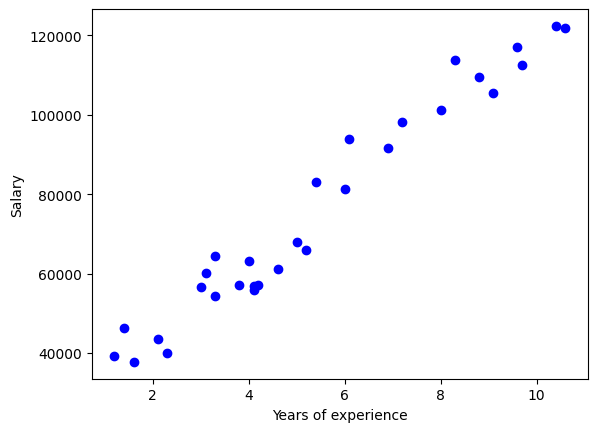

In [66]:
plt.scatter(data['YearsExperience'],data['Salary'],color='blue')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [68]:
X=data.iloc[:,1:-1]

In [69]:
print(X)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6


In [70]:
Y=data.iloc[:,-1]

In [71]:
print(Y)

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [86]:
X_train.shape


(24, 1)

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
model=DecisionTreeRegressor(criterion="absolute_error",max_depth=7)


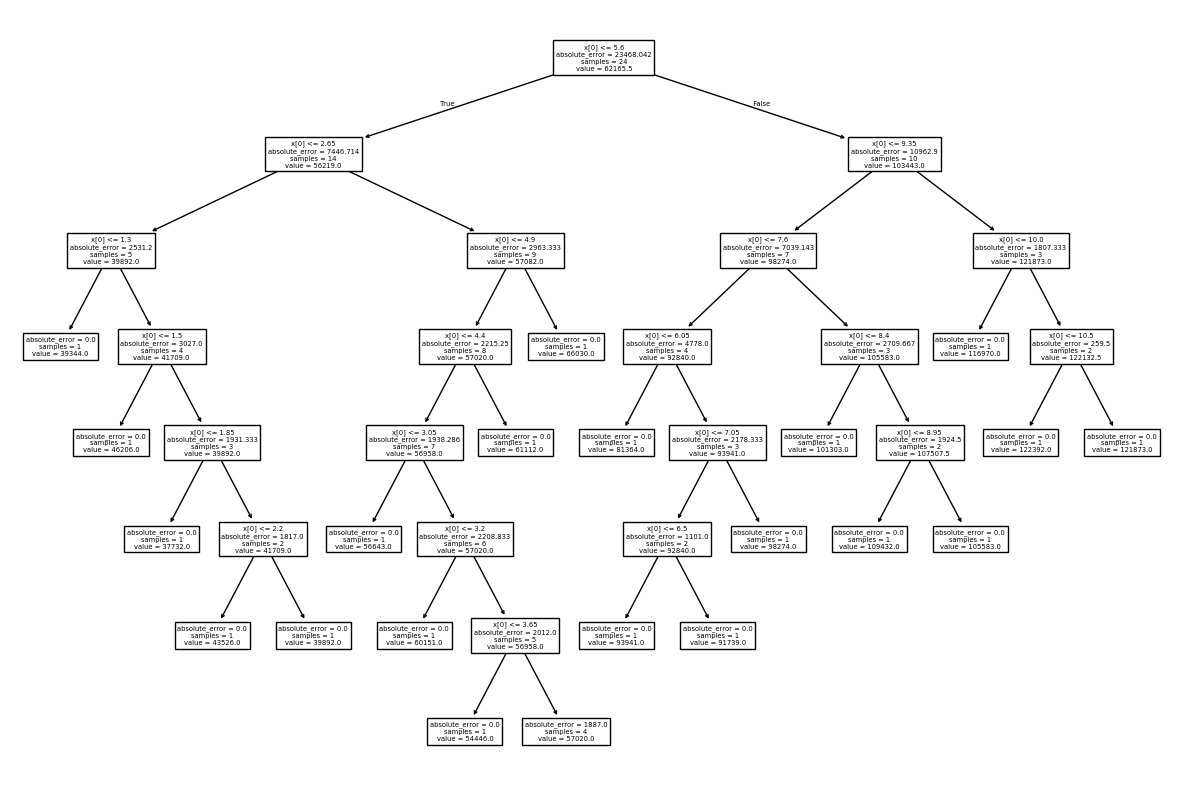

In [92]:
model.fit(X_train,Y_train)
plt.figure(figsize=(15,10))
plot_tree(model)
plt.show()


In [78]:
y_pred=model.predict(X_test)


In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [80]:
print("r2 score",r2_score(y_pred,Y_test))

r2 score 0.8291874980720554


In [81]:
print("Mean Squared error",mean_absolute_error(y_pred,Y_test))

Mean Squared error 7663.666666666667


In [97]:
#sample prediction
new_data=pd.DataFrame({
    "YearsExperience":[6]
})
print(model.predict(new_data)[0])

81364.0
